In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyjoystick.sdl2 import Key, Joystick, run_event_loop
from pprint import pprint
from threading import Thread
import time
import serial
from sklearn import linear_model
import cv2

In [ ]:
cap = cv2.VideoCapture(0)
# set blue thresh
lower_green = np.array([35,70,60])
upper_green = np.array([120,255,255])

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 1, fy = 1, interpolation = cv2.INTER_AREA)
    cv2.imshow('frame', frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # edges = cv2.Canny(mask, 100, 200)
    cv2.imshow('green edges', mask)
    if (cv2.waitKey(30) == 27):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
edges = mask

In [ ]:
greenpos0 = []
greenpos1 = []
for (index0,liste) in enumerate(edges):
    for (index1,value) in enumerate(liste):
        if value == 255:
            greenpos0.append(index0)
            greenpos1.append(index1)
            # print(value)

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [ ]:
ransac = linear_model.RANSACRegressor()
ransac.fit(np.array(greenpos0).reshape(-1, 1), np.array(greenpos1).reshape(-1, 1))

line_X = np.arange(min(greenpos0), max(greenpos0) + 1)[:, np.newaxis]
line_y = ransac.predict(line_X)

In [ ]:
inlier_mask = ransac.inlier_mask_

In [ ]:
# plt.figure(figsize = (4.8, 6.4))
# plt.xlim((0, 480))
# plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [ ]:
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [ ]:
inlier_mask = ransac.inlier_mask_

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(np.array(greenpos0).reshape(-1, 1)[inlier_mask], np.array(greenpos1).reshape(-1, 1)[inlier_mask], s = 1, marker = 'x')

In [ ]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][-1,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][-1,0]))

In [ ]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][0,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]))

In [ ]:
np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]

In [ ]:
Servo_t = [0, 29.85799098, 87.28123918, 49.99237628, 23.27381264], [54.25188891, 14.62139926, 51.21600907, 64.9204633, 113.30784031]

A_t = [[-0.96566657, 0.49763318, 0.95705414, -0.62148105, -0.44530939], [0.90419815, -0.66050816, 0.60991016, 0.22840757, 0.80645628]]

s_t = [[391, 402, 363, 365, 325], [360, 320, 441, 434, 471]]

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

In [ ]:
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((0, 180))
plt.ylim((0, 180))
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
print(ret)
if ret :
    print(ret)
    cv2.imwrite('./first_frame.jpg', frame)
    # cv2.imshow('test', frame)

# cap.release()
# cv2.destroyAllWindows()

### Load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('./data.npy', 'rb') as f:
    Servo_t = np.load(f)
    A_t = np.load(f)
    s_t = np.load(f)
    
print(np.shape(Servo_t), np.shape(A_t), np.shape(s_t))

In [ ]:
s_t[0, 0], s_t[1, 0]

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.title('green point position')
# plt.plot(s_t[0], s_t[1])
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((-0.1, 180.1))
plt.ylim((-0.1, 180.1))
# plt.plot(Servo_t[0], Servo_t[1])
plt.title('Servo angle inputs')
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

### reward fonction

In [ ]:
def reward(s_pos, target_pos):
    # reward(s_t[:, 0], s_t[:, 1])
    reward = np.linalg.norm(s_pos - target_pos)
    return reward

In [ ]:
min(s_t[0, :]), max(s_t[0, :]), min(s_t[1, :]), max(s_t[1, :])

In [ ]:
s_t[:, 0]

### reward figure

In [ ]:
plt.plot(lis)
episode = 10
file_name = './img' + str(episode) + '.png'
plt.savefig(file_name)
plt.close()

### tensorflow network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import linear_model
import cv2
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import random

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(120)
np.random.shuffle(x_train)
np.random.seed(120)
np.random.shuffle(y_train)

tf.random.set_seed(120)

In [ ]:
tf.shape(x_train), tf.shape(y_train)

In [ ]:
x_train[0], y_train[0]

In [ ]:
np.shape(x_train), np.shape(y_train)

In [ ]:
# #第三步，models.Sequential()
# model = tf.keras.models.Sequential([ #使用models.Sequential()来搭建神经网络
#     tf.keras.layers.Dense(3, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()) #全连接层，三个神经元，激活函数为softmax,使用l2正则化
# ])

In [ ]:
class irisModel(tf.keras.Model):
    def __init__(self):
        super(irisModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(3, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2()) #搭建网络块，这一层命名为d1
 
    def call(self, x):
        y = self.d1(x)
        return  y

model = irisModel()

#第四步，model.compile()
model.compile(  #使用model.compile()方法来配置训练方法
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), #使用SGD优化器，学习率为0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #配置损失函数
    metrics = ['sparse_categorical_accuracy'] #标注网络评价指标
)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#第五步，model.fit()
model.fit(  #使用model.fit()方法来执行训练过程，
    x_train, y_train, #告知训练集的输入以及标签，
    batch_size = 32, #每一批batch的大小为32，
    epochs = 500, #迭代次数epochs为500
    validation_split = 0.2, #从数据集中划分20%给测试集
    validation_freq = 20 #测试的间隔次数为20,每迭代20次测试一次准确率
)

#第六步，model.summary()
model.summary() #打印神经网络结构，统计参数数目

### create dataset

In [15]:
import numpy as np
from DQ_Learning import DQNet
import tensorflow as tf
with open('/home/mig5/Desktop/TR_DATA_RL/res_dqlearning_fix/minibatch.npy', 'rb') as f:
    mini_batch = np.load(f, allow_pickle=True)
    experience = np.load(f, allow_pickle=True)

print(np.shape(mini_batch), np.shape(experience))

(100, 4) (100, 4)


In [16]:
DQL = DQNet()

In [17]:
target_pos = np.array([400, 500])
x_train, y_train = [], []
minibatch = mini_batch
minibatch[92][0] = np.array([405, 343])

for (i, mini) in enumerate(minibatch):
    value_ = DQL.get_best(mini[3], target_pos, get_action = True)
    y_train.append(mini[2] + 0.99*value_)
    x_train.append([mini[0][0], mini[0][1], target_pos[0], target_pos[1], mini[1]])

DQL.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics = 'mae')

In [19]:
checkpoint_path = "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
DQL.fit(np.array(x_train), 
        np.array(y_train),
        epochs=100,
        callbacks=[cp_callback])

Epoch 1/100
1/4 [======>.......................] - ETA: 0s - loss: 75.5625 - mae: 75.5625
Epoch 1: saving model to cp.ckpt
4/4 [==============================] - 0s 16ms/step - loss: 76.0727 - mae: 76.0727
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 78.5829 - mae: 78.5829
Epoch 2: saving model to cp.ckpt
4/4 [==============================] - 0s 13ms/step - loss: 75.6727 - mae: 75.6727
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 74.8723 - mae: 74.8723
Epoch 3: saving model to cp.ckpt
4/4 [==============================] - 0s 7ms/step - loss: 75.2728 - mae: 75.2728
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 76.6740 - mae: 76.6740
Epoch 4: saving model to cp.ckpt
4/4 [==============================] - 0s 14ms/step - loss: 74.8728 - mae: 74.8728
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 71.7819 - mae: 71.7819
Epoch 5: saving model to cp.ckpt
4/4 [==============================] - 0s 8ms/step - l

In [21]:
model = DQNet()
model.load_weights(checkpoint_path)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics = 'mae')

# Re-evaluate the model
loss, acc = model.evaluate(np.array(x_train), np.array(y_train), verbose=2)

4/4 - 0s - loss: 36.5342 - mae: 36.5342 - 218ms/epoch - 55ms/step


In [18]:
DQL.fit(np.array(x_train), np.array(y_train),
        batch_size = 64, #每一批batch的大小为32，
        epochs = 200, #迭代次数epochs为500
        validation_split = 0.2, #从数据集中划分20%给测试集
        validation_freq = 20)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 3584353.2500 - mae: 3584353.2500
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 266493520.0000 - mae: 266493520.0000
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 154.0703 - mae: 154.0703
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 114.6900 - mae: 114.6900
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 114.4900 - mae: 114.4900
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 114.2900 - mae: 114.2900
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 114.0900 - mae: 114.0900
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 113.8900 - mae: 113.8900
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 113.6900 - mae: 113.6900
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 113.4900 - mae: 113.4900
Epoch 11/200
2/2 [=

In [24]:
import numpy as np

with open('../target_pos_list.npy', 'rb') as f:
    target_pos_list = np.load(f)

In [9]:
np.shape(target_pos_list)

(52, 2)

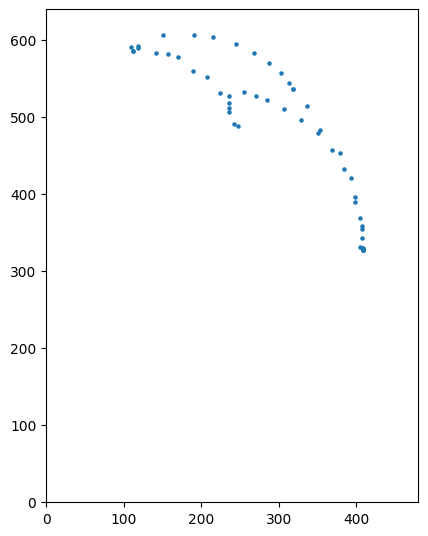

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(target_pos_list[:, 0], target_pos_list[:, 1], s = 5)